# Optical Flow and Motion Vectors

Example on performing Optical Flow and determining Motion Vectors between successive frames

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

## Read in the image frames


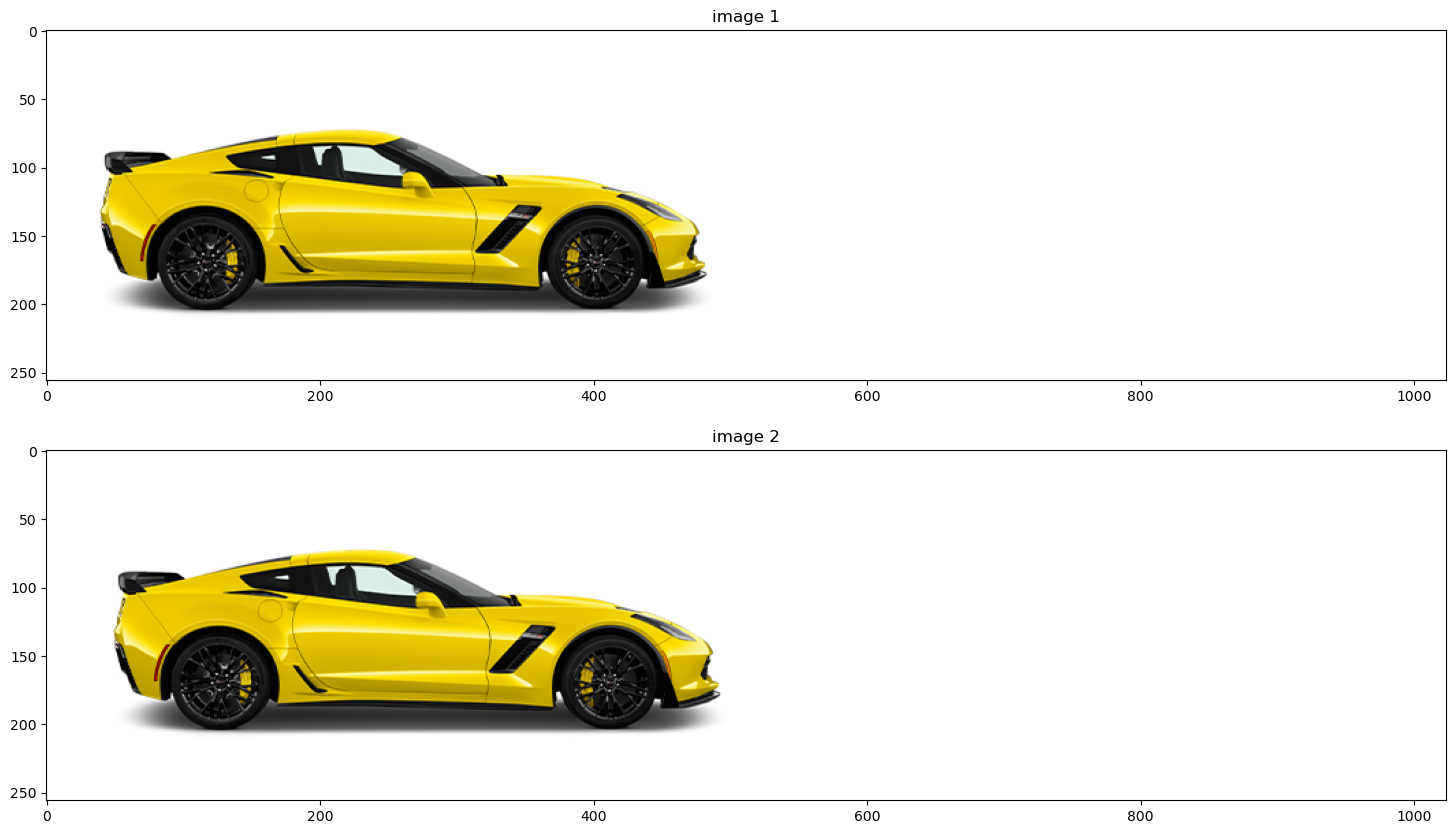

In [2]:
image_1 = cv2.imread("images/Corvette/Frame_1.jpg")
image_2 = cv2.imread("images/Corvette/Frame_2.jpg")

# Convert from BGR to RGB
imageRGB_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
imageRGB_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Display the images
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,10))
ax1.set_title("image 1")
ax1.imshow(imageRGB_1)
ax2.set_title("image 2")
ax2.imshow(imageRGB_2)


## Capture keypoints (with ShiTomasi detector)

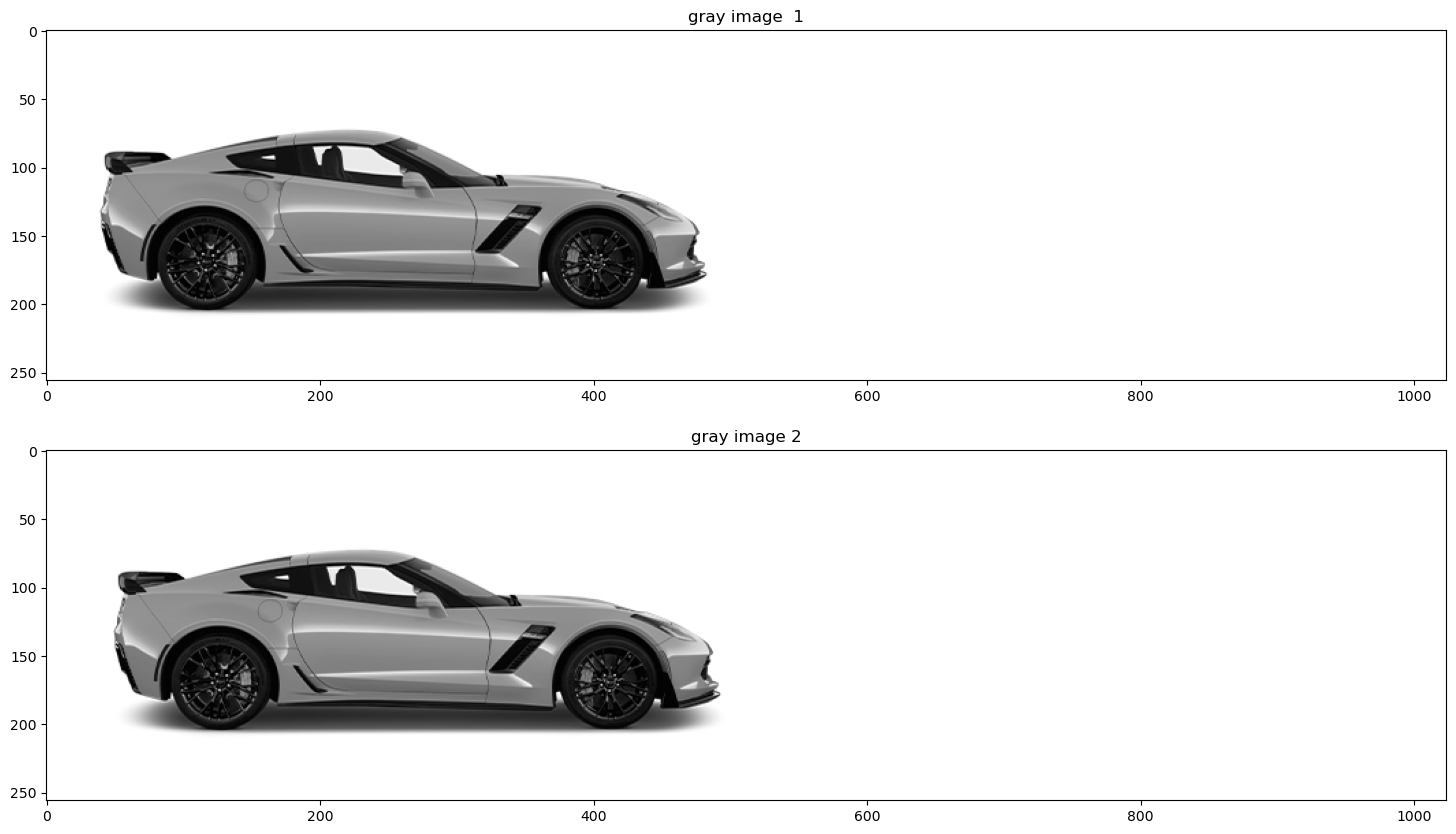

In [3]:
# Convert from RGB to Grayscale
imageGray_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
imageGray_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

# Display the Gray scale images
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,10))
ax1.set_title("gray image  1")
ax1.imshow(imageGray_1, cmap="gray")
ax2.set_title("gray image 2")
ax2.imshow(imageGray_2, cmap="gray")


Number of keypoints:  19


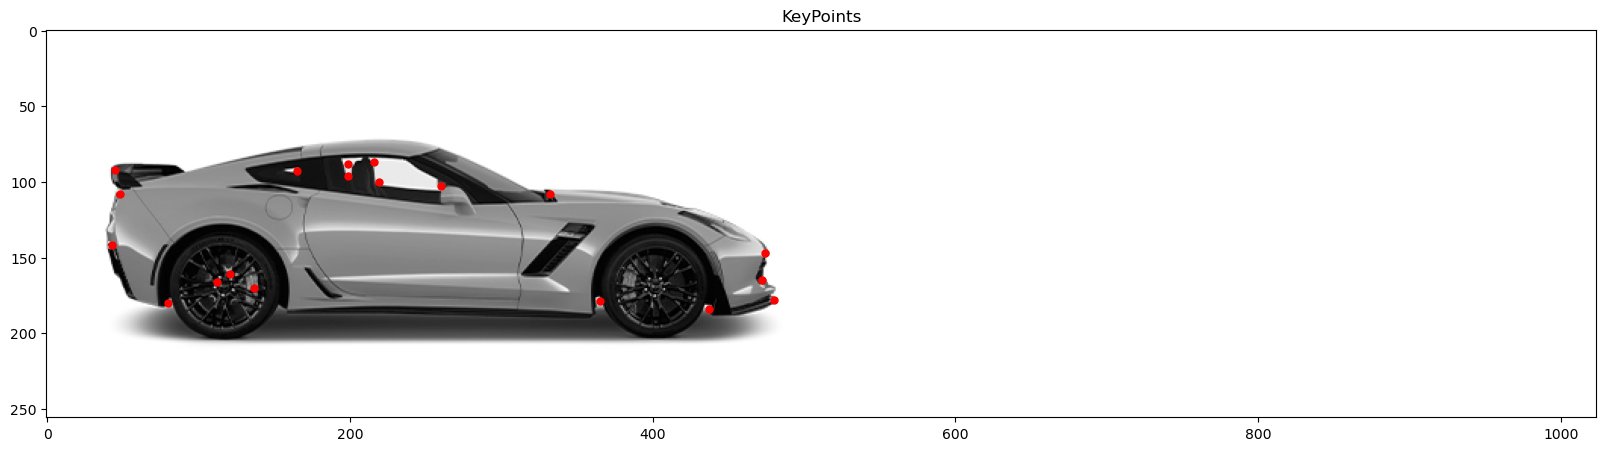

In [4]:
# ShiThomas corner detector settings
detector_parameters = { 
    "maxCorners" : 30,
    "qualityLevel" : 0.3,
    "minDistance" : 7,
    "blockSize" : 7
}

# Find corner points
keyPoints_frame_1 = cv2.goodFeaturesToTrack(imageGray_1, mask = None, **detector_parameters)
print("Number of keypoints: ", len(keyPoints_frame_1))

# Display keypoints
f, ax = plt.subplots(figsize=(20,10))
ax.set_title("KeyPoints")
ax.imshow(imageGray_1, cmap="gray")

for keyPoint in keyPoints_frame_1:
    plt.plot(keyPoint[0][0], keyPoint[0][1], 'r.', markersize = 10)


## Optical Flow (with Lucas-Kanade method)

In [12]:
# Lucal-Kanada Optical Flow Settings
lucas_kanade_parameters = {
    "winSize" : (20,20),
    "maxLevel" : 2,
    "criteria" : (cv2.TERM_CRITERIA_EPS | cv2.TermCriteria_COUNT, 10, 0.03)
}

# Calculate optical flow between Images 1 and 2
keyPoints_frame_2, matches, err = cv2.calcOpticalFlowPyrLK(imageGray_1, imageGray_2, keyPoints_frame_1, None, ** lucas_kanade_parameters)

# Get matching points
matches_frame_2 = keyPoints_frame_2[matches == 1]
matches_frame_1 = keyPoints_frame_1[matches == 1] 

#print(matches_frame_2)
#print(matches_frame_2[0][0])

## Display Motion Vectors

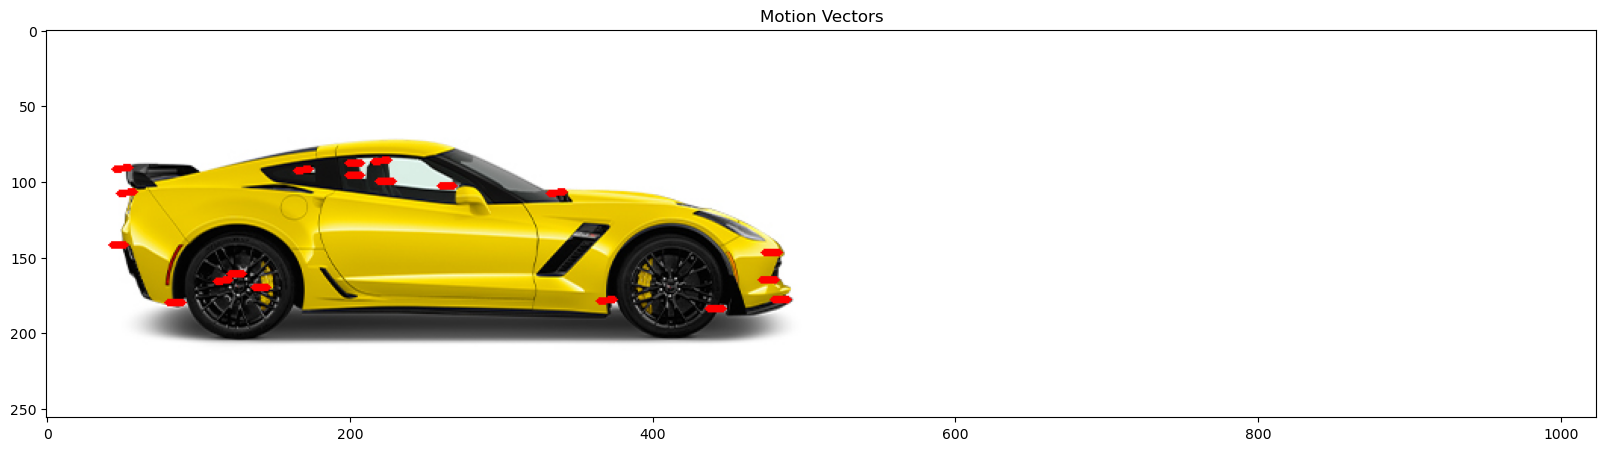

In [13]:
imageVectorsBGR = np.copy(image_2)
imageVectorsRGB = np.copy(imageRGB_2)

# Draw motion vectors (lines) between matching points
for p1,p2 in zip(matches_frame_1,matches_frame_2):
    cv2.line(imageVectorsBGR, (int(p1[0]), int(p1[1])), (int(p2[0]), int(p2[1])), (0,0,255), 3)
    cv2.line(imageVectorsRGB, (int(p1[0]), int(p1[1])), (int(p2[0]), int(p2[1])), (255,0,0), 3)

f, ax = plt.subplots(figsize=(20,10))
ax.set_title("Motion Vectors")
ax.imshow(imageVectorsRGB)

# cv2.imshow("Motion Vectors", imageVectorsBGR)
# cv2.waitKey()
# cv2.destroyAllWindows()
